## Поиск по сетке - Grid search

- Сложные модели как праивло имеют несколько гиперпараметров
- Поиск по сетке - способ обучения и оценки работы модели для различных комбинаций значений гиперпараметров

- Класс GridSearceCV  автоматически перебирает значения в словаре по разным гиперпараметрам

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


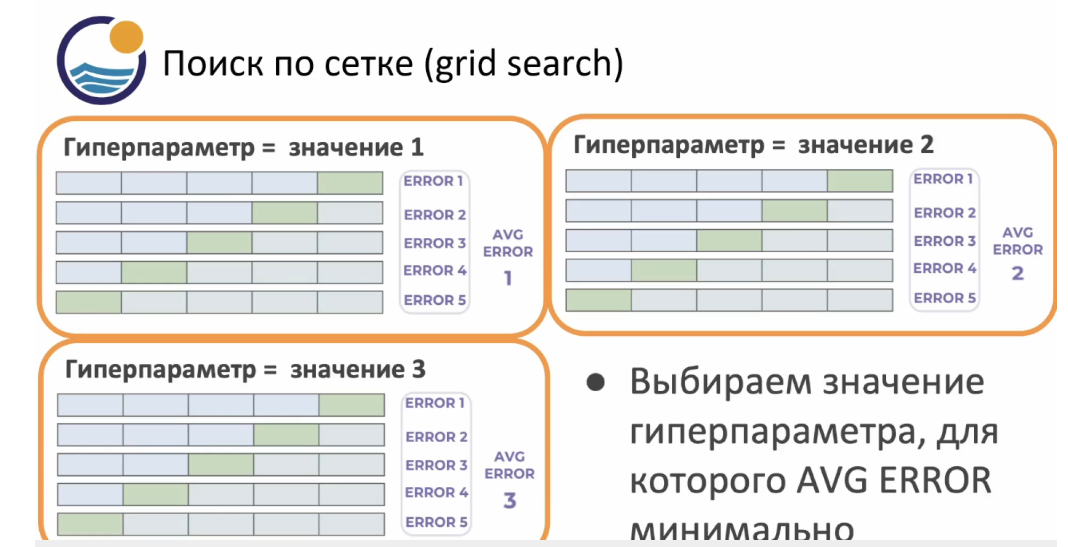

In [3]:
from IPython.display import Image
Image('/content/gdrive/MyDrive/Colab Notebooks/Images/GridSearch.png')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Advertising.csv')

In [6]:
## Создаём X и y
X = df.drop('sales',axis=1)
y = df['sales']

# Делаем разбиение на TRAIN и TEST
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Масштабируем данные (SCALE)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Представим что у нас есть модель с двумя гиперпараметрами.

Возьмем Elastic Net и будем рассматривать два ее параметра:
- l1_ratio - задает соотношение между lasso и ridge регрессиями
- на сколько сильно мы применяем штрафное слагаемое для регуляризации

In [7]:
from sklearn.linear_model import ElasticNet

найти такие параметры чтобы они были оптимальными.

Что значит оптимальны?: когда метрика получаема минимальна (RMAE)

In [8]:
base_elastic_net_model = ElasticNet()

In [13]:
# создаем словарь по которому будет проходить GridSearch и проверять гиперпараметры
param_grid = {'alpha':[0.1, 1, 5, 50, 100],
              'l1_ratio':[.1,.5,.7, .95, .99, 1]}

In [12]:
from sklearn.model_selection import GridSearchCV

In [14]:
# estimator - наша модель
# param_grid - словарь с гиперпараметрами
# scoring - метрика по которой будет проводиться оценка
# cv - на сколько частей разибать train
# verbose - нужно ли выводить детальную информацию - чем больit значение - тем больше информации будет выводиться
grid_model = GridSearchCV(estimator = base_elastic_net_model,
                          param_grid=param_grid,
                          scoring = 'neg_mean_squared_error',
                          cv = 5,
                          verbose=2)

In [15]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1,

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

- Проход по всем комбинациями гиперпараметров
- кросс-валидация с разбиением данным на K (cv=K) частей
- Возвращает уже обученую модель

In [16]:
# а это наиулучшая комбинация и параметры
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=1)

In [18]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005112,0.004144,0.001576,0.000148,0.1,0.10,"{'alpha': 0.1, 'l1_ratio': 0.1}",-3.453021,-1.405190,-5.789125,-2.187302,-4.645576,-3.496043,1.591601,6
1,0.002862,0.000954,0.001968,0.000904,0.1,0.50,"{'alpha': 0.1, 'l1_ratio': 0.5}",-3.325440,-1.427522,-5.595610,-2.163089,-4.451679,-3.392668,1.506827,5
2,0.005670,0.002736,0.002870,0.001839,0.1,0.70,"{'alpha': 0.1, 'l1_ratio': 0.7}",-3.269880,-1.442432,-5.502437,-2.163950,-4.356738,-3.347088,1.462765,4
3,0.006850,0.001387,0.003923,0.001303,0.1,0.95,"{'alpha': 0.1, 'l1_ratio': 0.95}",-3.213052,-1.472417,-5.396258,-2.177452,-4.241080,-3.300052,1.406248,3
4,0.006951,0.003035,0.003640,0.001546,0.1,0.99,"{'alpha': 0.1, 'l1_ratio': 0.99}",-3.208124,-1.478489,-5.380242,-2.181097,-4.222968,-3.294184,1.396953,2
5,0.008276,0.003751,0.003237,0.002127,0.1,1.00,"{'alpha': 0.1, 'l1_ratio': 1}",-3.206943,-1.480065,-5.376257,-2.182076,-4.218460,-3.292760,1.394613,1
6,0.002093,0.000113,0.001290,0.000047,1.0,0.10,"{'alpha': 1, 'l1_ratio': 0.1}",-9.827475,-5.261525,-11.875347,-7.449195,-8.542329,-8.591174,2.222939,12
7,0.003653,0.002621,0.003893,0.002275,1.0,0.50,"{'alpha': 1, 'l1_ratio': 0.5}",-8.707071,-4.214228,-10.879261,-6.204545,-7.173031,-7.435627,2.255532,11
8,0.005555,0.000986,0.002799,0.001008,1.0,0.70,"{'alpha': 1, 'l1_ratio': 0.7}",-7.920870,-3.549562,-10.024877,-5.379553,-6.324836,-6.639940,2.206213,10
9,0.007003,0.002848,0.004313,0.000597,1.0,0.95,"{'alpha': 1, 'l1_ratio': 0.95}",-6.729435,-2.591285,-8.709842,-4.156317,-5.329916,-5.503359,2.102835,9


Если не устроило - пробуем заменить лист гиперпармаметров

Если устроила - делают финальную predictions

In [19]:
y_pred = grid_model.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
mean_squared_error(y_test, y_pred)

2.387342642087474

Такой поиск по сетке удобен с небольшим количество данных и достаточных параметров ПК.

## Random Search

Сокращает трудоемкость высчлительных процессов при использовании того же метода поиска, что был выше GridSearch

Здесь ввсе также как в предыдущем методе, но есть доп параметр:
- n_iter - количество итераций
- random_state - для воспроизведения случайности

Суть - случайные комбинации берутся. Но с некоторым распределением все таки -как нормальное, целочиленное, дистрибутивное

Тут даже етсь преимущество -

In [22]:
## Создаём X и y
X = df.drop('sales',axis=1)
y = df['sales']

# Делаем разбиение на TRAIN и TEST
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Масштабируем данные (SCALE)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import ElasticNet

In [25]:
r_model = ElasticNet()

In [26]:
import scipy

In [34]:
param_distributions = {'alpha':scipy.stats.uniform(0.1, 1),
              'l1_ratio':scipy.stats.uniform(0.1,1-0.1)}

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [35]:
# не забываем про n_iter = 100, так как по умолчанию он проходится все 10 раз, а это маловато, учитывая что у нас и так не очень мног данных
r_grid_search = RandomizedSearchCV(estimator = r_model,
                          param_distributions=param_grid,
                          scoring = 'neg_mean_squared_error',
                          cv = 5,
                          verbose=0,
                          n_iter=100,
                           random_state = 10)

In [38]:
r_grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=ElasticNet(), n_iter=100,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d42e7fef740>,
                                        'l1_ratio': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d42e7261c70>},
                   random_state=10, scoring='neg_mean_squared_error')

In [39]:
r_grid_search.best_params_

{'alpha': np.float64(0.11486002463322811),
 'l1_ratio': np.float64(0.9801093370618045)}

In [40]:
y_pred_r = r_grid_search.predict(X_test)

In [41]:
mean_squared_error(y_test, y_pred_r)

2.409924006578166